In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
keras.__version__

'2.3.1'

In [3]:
tf.__version__

'2.2.0'

In [4]:
random.seed(42)

# version check

In [5]:
version = 'v4'

# label load

In [6]:
train_X = pd.read_excel('./data/all_10_random_12000_262_train.xlsx')
train_X = train_X.drop(['Unnamed: 0', 'abstract'], axis=1)
train_X

,4차산업혁명,가족건강성,간호,간호대학생,간호사,감정,감정노동,개인정보,개인정보보호,개인정보보호법,...,한류,한반도,한중,해외직접투자,핵심역량,행복감,현상학,확인적요인분석,회복탄력성,희망
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
val_X = pd.read_excel('./data/all_10_random_12000_262_val.xlsx')
val_X = val_X.drop(['Unnamed: 0', 'abstract'], axis=1)
val_X

,4차산업혁명,가족건강성,간호,간호대학생,간호사,감정,감정노동,개인정보,개인정보보호,개인정보보호법,...,한류,한반도,한중,해외직접투자,핵심역량,행복감,현상학,확인적요인분석,회복탄력성,희망
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_X = pd.read_excel('./data/all_10_random_12000_262_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,4차산업혁명,가족건강성,간호,간호대학생,간호사,감정,감정노동,개인정보,개인정보보호,개인정보보호법,...,한류,한반도,한중,해외직접투자,핵심역량,행복감,현상학,확인적요인분석,회복탄력성,희망
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
one_hot_train_labels = np.array(train_X)
one_hot_train_labels
print(one_hot_train_labels.shape)

one_hot_val_labels = np.array(val_X)
one_hot_val_labels
print(one_hot_val_labels.shape)

one_hot_test_labels = np.array(test_X)
one_hot_test_labels
print(one_hot_test_labels.shape)

(2798, 262)
(932, 262)
(932, 262)


# trained model load

In [10]:
encoder = load_model('./weights/residual_encoder_extra_all_{}.h5'.format(version))
decoder = load_model('./weights/residual_decoder_extra_all_{}.h5'.format(version))

C:\Users\user\.conda\envs\mlc2\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


### train data

In [11]:
train_encode = encoder.predict(one_hot_train_labels)
train_encode

array([[5.194959  , 0.4636197 , 3.0995185 , 1.8376386 ],
       [2.523835  , 3.2606113 , 1.6696863 , 3.3709402 ],
       [0.9303211 , 0.54241985, 1.8524305 , 0.        ],
       ...,
       [1.834378  , 1.1154475 , 4.501013  , 3.0992413 ],
       [7.8867    , 2.7308183 , 1.9361246 , 2.332378  ],
       [1.561563  , 1.1820061 , 2.323821  , 1.4821433 ]], dtype=float32)

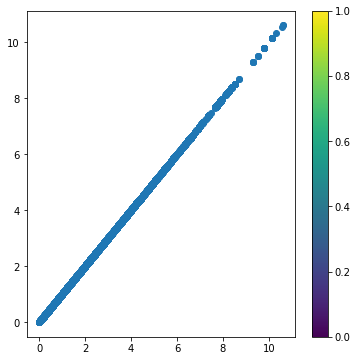

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(train_encode[:, :], train_encode[:, :])
plt.colorbar()
plt.show()

In [13]:
train_encode_df = pd.DataFrame(train_encode)
train_encode_df

,0,1,2,3
0,5.194959,0.463620,3.099519,1.837639
1,2.523835,3.260611,1.669686,3.370940
2,0.930321,0.542420,1.852430,0.000000
3,5.194959,0.463620,3.099519,1.837639
4,4.333861,3.978497,3.662714,3.577977
...,...,...,...,...
2793,4.946594,8.686300,1.476334,0.000000
2794,7.886700,2.730818,1.936125,2.332378
2795,1.834378,1.115448,4.501013,3.099241
2796,7.886700,2.730818,1.936125,2.332378


In [14]:
train_encode_df.to_excel('./rae_extra_all_{}_latent_vector_train.xlsx'.format(version))

In [15]:
train_decode = decoder.predict(train_encode)
train_decode

array([[3.62796118e-20, 9.69175342e-03, 3.45095114e-14, ...,
        7.18617765e-13, 8.07768902e-06, 8.91330558e-07],
       [5.11353051e-07, 4.81924362e-04, 8.73683457e-05, ...,
        7.02094596e-08, 1.42321187e-05, 9.46175714e-06],
       [1.25035609e-08, 3.69059489e-05, 1.35457219e-08, ...,
        8.60006111e-08, 1.96334650e-03, 1.39435122e-06],
       ...,
       [1.66381890e-18, 6.80603485e-09, 5.45434574e-12, ...,
        3.19778093e-10, 2.25245276e-06, 2.81415993e-12],
       [6.90495157e-24, 8.50758170e-06, 1.31785061e-09, ...,
        2.46308777e-17, 1.33149451e-05, 3.36525954e-06],
       [1.18683836e-08, 1.07833825e-04, 2.01470897e-07, ...,
        5.83396786e-06, 1.04417653e-04, 5.10312930e-07]], dtype=float32)

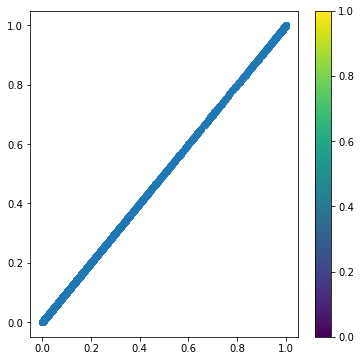

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(train_decode[:, :], train_decode[:, :])
plt.colorbar()
plt.show()

In [17]:
train_predict = train_decode.round()
train_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
"""train_predict = np.where(train_decode > 0.5, 1, 0)
train_predict"""

'train_predict = np.where(train_decode > 0.5, 1, 0)\ntrain_predict'

In [19]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [20]:
#c_matrix.shape

In [21]:
#c_matrix

In [22]:
print('accuracy : ', accuracy_score(one_hot_train_labels, train_predict))
print('precision : ', precision_score(one_hot_train_labels, train_predict, average='micro'))
print('recall : ', recall_score(one_hot_train_labels, train_predict, average='micro'))
print('f1 : ', f1_score(one_hot_train_labels, train_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_train_labels, train_predict))

accuracy :  0.4253037884203002
precision :  0.960313315926893
recall :  0.4659234861920446
f1 :  0.6274309109518936
------------------------
hamming_loss :  0.0029792272561098712


In [23]:
train_predict_df = pd.DataFrame(train_predict)
train_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#train_predict_df.to_excel('./train_latent_vector.xlsx')

### validation data

In [25]:
val_encode = encoder.predict(one_hot_val_labels)
val_encode

array([[4.252167  , 2.9480698 , 0.19373366, 2.8416672 ],
       [4.44807   , 5.104998  , 1.6744218 , 0.2115413 ],
       [4.9419518 , 1.1893524 , 0.9480799 , 5.8248134 ],
       ...,
       [2.3566418 , 6.1746287 , 5.023723  , 1.8912238 ],
       [3.2850776 , 3.2596087 , 2.3905046 , 1.1224436 ],
       [2.872831  , 2.4748194 , 1.0559025 , 2.0220835 ]], dtype=float32)

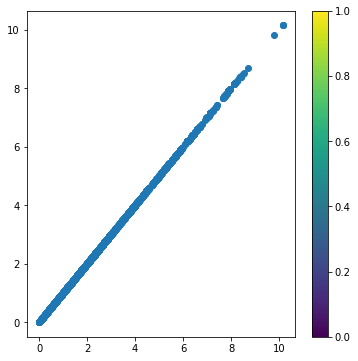

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(val_encode[:, :], val_encode[:, :])
plt.colorbar()
plt.show()

In [27]:
val_encode_df = pd.DataFrame(val_encode)
val_encode_df

,0,1,2,3
0,4.252167,2.948070,0.193734,2.841667
1,4.448070,5.104998,1.674422,0.211541
2,4.941952,1.189352,0.948080,5.824813
3,7.061509,4.723454,1.920044,4.697660
4,2.356642,6.174630,5.023724,1.891224
...,...,...,...,...
927,2.117849,2.717265,1.860312,0.000000
928,4.311187,1.612342,2.545564,1.304350
929,2.356642,6.174629,5.023723,1.891224
930,3.285078,3.259609,2.390505,1.122444


In [28]:
val_encode_df.to_excel('./rae_extra_all_{}_latent_vector_val.xlsx'.format(version))

In [29]:
val_decode = decoder.predict(val_encode)
val_decode

array([[3.4779956e-15, 3.9356918e-04, 1.5260992e-02, ..., 6.3426236e-10,
        5.8471569e-04, 2.6826998e-03],
       [8.2469477e-17, 4.3185629e-08, 3.7064353e-14, ..., 8.0205645e-14,
        4.6359942e-06, 2.1569712e-12],
       [2.8948694e-20, 1.4514423e-07, 1.2849250e-06, ..., 1.0789805e-09,
        3.3456327e-03, 4.6588120e-04],
       ...,
       [2.8596166e-06, 6.7678467e-09, 7.1031994e-21, ..., 1.2561417e-18,
        1.8293116e-10, 1.9390673e-18],
       [2.0606297e-10, 2.9009670e-06, 8.4593887e-11, ..., 3.8389183e-10,
        1.7005204e-06, 1.1235511e-09],
       [5.8595273e-10, 3.4359074e-04, 1.5927096e-04, ..., 1.2420979e-07,
        7.5960142e-04, 8.4532243e-05]], dtype=float32)

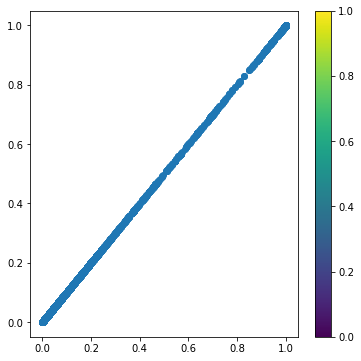

In [30]:
plt.figure(figsize=(6, 6))
plt.scatter(val_decode[:, :], val_decode[:, :])
plt.colorbar()
plt.show()

In [31]:
val_predict = val_decode.round()
val_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
"""val_predict = np.where(val_decode > 0.5, 1, 0)
val_predict"""

'val_predict = np.where(val_decode > 0.5, 1, 0)\nval_predict'

In [33]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [34]:
#c_matrix.shape

In [35]:
#c_matrix

In [36]:
print('accuracy : ', accuracy_score(one_hot_val_labels, val_predict))
print('precision : ', precision_score(one_hot_val_labels, val_predict, average='micro'))
print('recall : ', recall_score(one_hot_val_labels, val_predict, average='micro'))
print('f1 : ', f1_score(one_hot_val_labels, val_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_val_labels, val_predict))

accuracy :  0.3562231759656652
precision :  0.8951048951048951
recall :  0.39414934565050036
f1 :  0.547300908605024
------------------------
hamming_loss :  0.0034686957376404677


In [37]:
val_predict_df = pd.DataFrame(val_predict)
val_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#val_predict_df.to_excel('./val_latent_vector.xlsx')

### test data

In [39]:
test_encode = encoder.predict(one_hot_test_labels)
test_encode

array([[2.3566422 , 6.1746297 , 5.023724  , 1.8912241 ],
       [1.7280558 , 2.4908192 , 1.4812768 , 0.3093629 ],
       [0.569367  , 2.4113488 , 0.66978383, 2.9123569 ],
       ...,
       [3.0786812 , 0.95607716, 1.3385925 , 0.8364993 ],
       [7.7143564 , 5.5158367 , 1.5989786 , 2.919135  ],
       [1.8971393 , 2.6738284 , 1.905965  , 2.3248596 ]], dtype=float32)

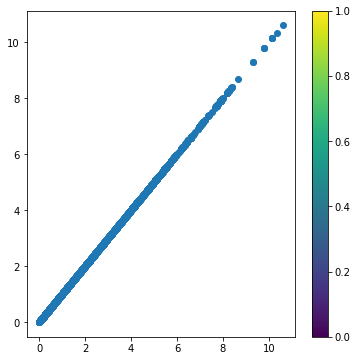

In [40]:
plt.figure(figsize=(6, 6))
plt.scatter(test_encode[:, :], test_encode[:, :])
plt.colorbar()
plt.show()

In [41]:
test_encode_df = pd.DataFrame(test_encode)
test_encode_df

,0,1,2,3
0,2.356642,6.174630,5.023724,1.891224
1,1.728056,2.490819,1.481277,0.309363
2,0.569367,2.411349,0.669784,2.912357
3,1.272908,0.038271,3.581591,5.395686
4,5.353525,2.865519,0.000000,1.439444
...,...,...,...,...
927,0.000000,1.773600,0.121333,4.443259
928,0.000000,3.431511,3.441139,2.680054
929,3.078681,0.956077,1.338593,0.836499
930,7.714356,5.515837,1.598979,2.919135


In [42]:
test_encode_df.to_excel('./rae_extra_all_{}_latent_vector_test.xlsx'.format(version))

In [43]:
test_decode = decoder.predict(test_encode)
test_decode

array([[2.8596114e-06, 6.7678338e-09, 7.1031461e-21, ..., 1.2561322e-18,
        1.8292941e-10, 1.9390598e-18],
       [3.8599546e-07, 9.7084572e-05, 1.6728583e-08, ..., 5.1768815e-08,
        3.7214530e-04, 2.7720537e-07],
       [2.1986955e-06, 1.1537716e-03, 1.4628014e-03, ..., 5.8076557e-06,
        8.7866756e-06, 2.5597130e-04],
       ...,
       [1.8939711e-11, 4.1065933e-03, 3.1518340e-07, ..., 1.9968939e-08,
        1.5546579e-03, 6.7739334e-04],
       [1.7107791e-23, 2.6963713e-08, 2.9483413e-09, ..., 4.6154190e-17,
        2.1035078e-08, 7.3411571e-10],
       [1.2889892e-04, 4.1276228e-04, 3.4732661e-06, ..., 2.1245530e-06,
        2.2572875e-05, 2.8136697e-06]], dtype=float32)

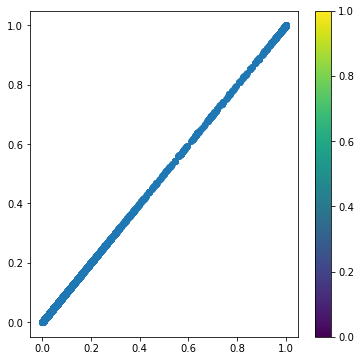

In [44]:
plt.figure(figsize=(6, 6))
plt.scatter(test_decode[:, :], test_decode[:, :])
plt.colorbar()
plt.show()

In [45]:
test_predict = test_decode.round()
test_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
"""test_predict = np.where(test_decode > 0.5, 1, 0)
test_predict"""

'test_predict = np.where(test_decode > 0.5, 1, 0)\ntest_predict'

In [47]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [48]:
#c_matrix.shape

In [49]:
#c_matrix

In [50]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.398068669527897
precision :  0.9068627450980392
recall :  0.41918429003021146
f1 :  0.5733471074380165
------------------------
hamming_loss :  0.0033826950168725223


In [51]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='samples'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='samples'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='samples'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.398068669527897
precision :  0.5464949928469243
recall :  0.4784513590844063
f1 :  0.4984161046392806
------------------------
hamming_loss :  0.0033826950168725223


C:\Users\user\.conda\envs\mlc2\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
test_predict_df = pd.DataFrame(test_predict)
test_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#test_predict_df.to_excel('./test_latent_vector.xlsx')